In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dfTrain = pd.read_csv('../data/TRAIN_TEST_corrected2/train_corrected2.csv').sample(frac=0.50)
train = dfTrain.drop(['price_usd', 'id'], axis=1)
target = dfTrain.price_usd

In [3]:
# DATA SCALING

scaler = StandardScaler().fit(train)
train = pd.DataFrame(scaler.transform(train), columns=train.columns)
train.head(3)

,year_created,month_created,day_created,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store
0,-1.019930,1.788930,-1.731074,-0.261775,-0.260166,0.197062,-0.350498,0.567830,-0.254156,0.852224,-0.725807,-0.123455
1,0.660018,-0.387472,-0.622589,-0.262169,-0.259677,0.193529,-0.456444,-1.262841,-0.254156,0.852224,-0.725807,-0.123455
2,0.660018,0.545272,-1.176831,-0.247970,-0.245897,0.172238,-0.376396,-0.347505,-0.254156,0.852224,-0.725807,-0.123455


In [4]:
# PARAMETROS PARA SVM
param_grid = [
                {'C': [10],
                 'kernel': ['rbf'],
                 'gamma': [0.2, 'auto', 0.05, 0.01] } ]

# MEDIDA DE SCORE PARA CROSS-VALIDATION
scoring = {'MSE': 'neg_mean_squared_error'}

svr = SVR(max_iter=200, cache_size=3000)
gs = GridSearchCV(svr, scoring=scoring, param_grid=param_grid, cv=10, refit='MSE', return_train_score=False)

In [5]:
# COMIENZO EL GRID SEARCH
gs.fit(train, target);

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [6]:
results = gs.cv_results_
dfResults = pd.DataFrame(results).loc[:, ('rank_test_MSE', 'mean_test_MSE', 
                                          'param_kernel', 'param_C', 'param_gamma')].infer_objects()

In [7]:
dfResults.sort_values(by='rank_test_MSE').head(10)

,rank_test_MSE,mean_test_MSE,param_kernel,param_C,param_gamma
2,1,-3.793966e+12,rbf,10,0.05
3,2,-3.793967e+12,rbf,10,0.01
1,3,-3.795745e+12,rbf,10,auto
0,4,-3.797652e+12,rbf,10,0.2


In [8]:
#combinatorias = set()

#for gamma in param_grid[0]['gamma'] :
#    for _c in param_grid[0]['C'] :
#        tupla = (_c, gamma)
        
#        if tupla not in combinatorias and tupla[::-1] not in combinatorias :
#            combinatorias.add(tupla)
            
#dfs = []

#for opcion in combinatorias :
#    dfs.append(dfResults.loc[dfResults.param_gamma.str.contains(opcion[0]) & dfResults.param_C.str.contains(opcion[1])])

In [9]:
# Ploteo los resultados

#ax = None
#for df in dfs :
#    df = df.reset_index()
#    new_name = df.param_gamma[0] + ' | ' + df.param_C[0]
#    df = df.rename(columns={'mean_test_MSE':new_name })
#    ax = df.plot(ax=ax, x='param_n_neighbors', y=new_name, 
#                 figsize=(12, 12))

#ax.grid()
#ax.set_title("Grid Search SVR: finding best metric and k value", fontsize=18)
#ax.set_xlabel('K neighbors', fontsize=14)
#ax.set_ylabel('NegMSE\n(higher is better)', fontsize=14)
#ax.legend(fontsize=11);

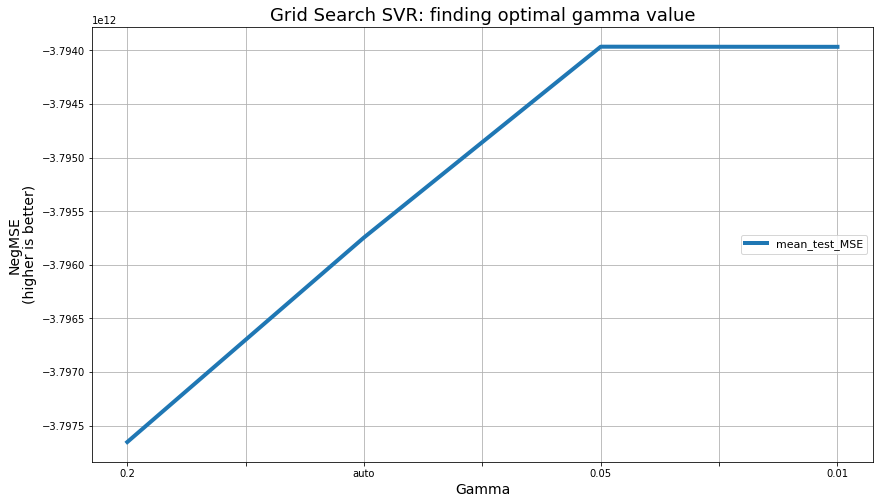

In [10]:
ax = dfResults.plot(x='param_gamma', y='mean_test_MSE', figsize=(14, 8), lw=4)
ax.grid()
ax.set_title("Grid Search SVR: finding optimal gamma value", fontsize=18)
ax.set_xlabel('Gamma', fontsize=14)
ax.set_ylabel('NegMSE\n(higher is better)', fontsize=14)
ax.legend(fontsize=11, loc='center right');

In [11]:
print "\nMejores parametros:", gs.best_params_
print "Tuvieron un error de:", repr(-gs.best_score_), "midiendo como MSE"


Mejores parametros: {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
Tuvieron un error de: 3793965695016.7246 midiendo como MSE
